# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import normalize
from os.path import join
from os import listdir
import torch
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cuda


# Utils

In [2]:
measure2index={"x-coordinate":0,"y-coordinate":1,"timestamp":2, "button_status":3,"pressure":4, "tilt":5,"elevation":6}
index2measure=list(measure2index.keys())

task2index={"spiral":0,"l":1,"le":2 ,"les":3,"lektorka" :4,"porovnat":5,"nepopadnout":6, "tram":7}
index2task=list(task2index.keys())

In [3]:
index2measure

['x-coordinate',
 'y-coordinate',
 'timestamp',
 'button_status',
 'pressure',
 'tilt',
 'elevation']

In [4]:
index2task

['spiral', 'l', 'le', 'les', 'lektorka', 'porovnat', 'nepopadnout', 'tram']

# Data
## Loading

In [5]:
data_path=join("..","PaHaW","PaHaW_public")#/00026/00026__1_1.svc"
folder_path=listdir(data_path)
folder_path.sort()

In [6]:
meta_path=join("..","PaHaW","corpus_PaHaW.csv")
meta_data=[]
with open(meta_path) as file:
    for line in file.readlines():
        meta_data.append(line.split(";"))
meta_data.pop(0)
meta_data=np.asarray(meta_data)
labels=[1 if i =="ON" else 0 for i in meta_data[:,4]]


In [7]:
target=[[0,1] if i ==1 else [1,0] for i in labels]

In [8]:
task_path=listdir(join(data_path,folder_path[46]))
task_path.sort()

Subjects 46,
60 and
66 didn't perform the spiral !


In [9]:
raw=[]
for folder in folder_path:
    subject=[]
    task_path=listdir(join(data_path,folder))
    task_path.sort()
    if len(task_path)!=8:#subject didn't perform the spiral
        subject.append([])#add an empty array so that all tasks are on the same column number
    for task in task_path:
        measures=[]
        path=join(data_path,folder,task)
        with open(path) as file:
            for line in file.readlines():
                measures.append(line.split())
            measures.pop(0)
        subject.append(measures)
    raw.append(subject)

In [10]:
print("(75 subjects, 8 tasks, X task duration*200, 7 recorded signals)")
print(len(raw),len(raw[0]),len(raw[0][0]),len(raw[0][0][0]))

(75 subjects, 8 tasks, X task duration*200, 7 recorded signals)
75 8 1772 7


The task sequence is in average **2286** &rarr; task duration is in average 11.4s

In [11]:
somme=0
for subject in raw:
    for task in subject:
        if len(task)!=0:#we don't take into account the 3 spirals not performed by subjects 46, 60 and 66
            somme+=len(task)
print("moyenne longueur",somme/(75*8-3))#-3 because 3 subjects didn't perform 1 task

moyenne longueur 2285.7939698492464


## Exploration

spiral
Subject n° 46 didn't perform spiral task
l
le
les
lektorka
porovnat
nepopadnout
tram


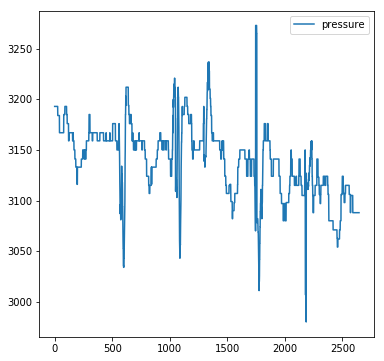

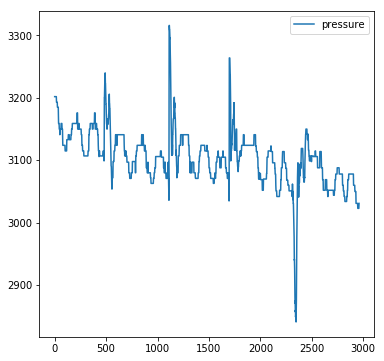

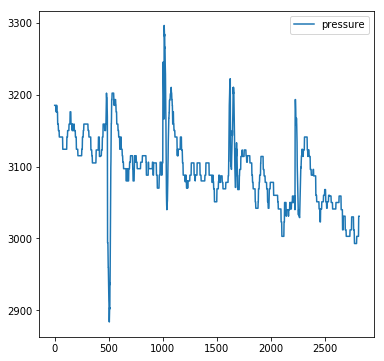

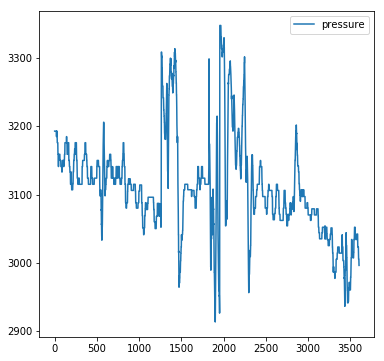

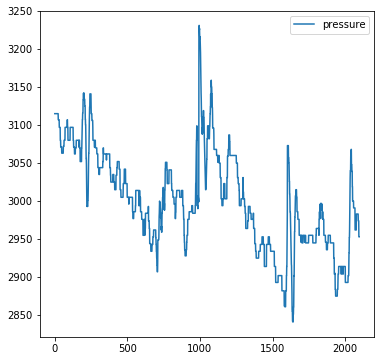

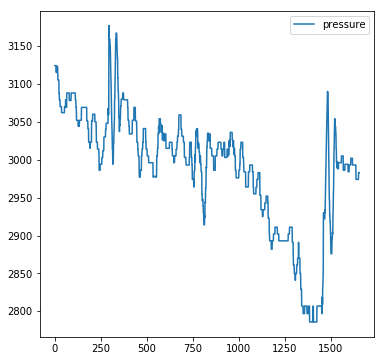

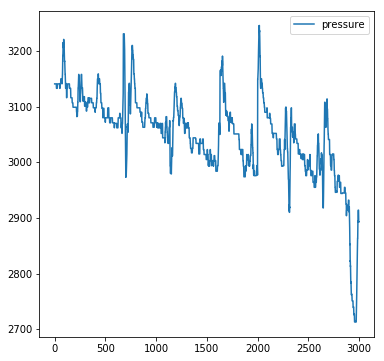

In [12]:
%matplotlib inline
subject_index=46
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[subject_index][j],dtype=int)
    if task.size!=0:
        plt.figure(figsize=(6,6))
        for i in [4]:
            plt.plot(task[:,i],label=index2measure[i])
            plt.legend()
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))
    

0
spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


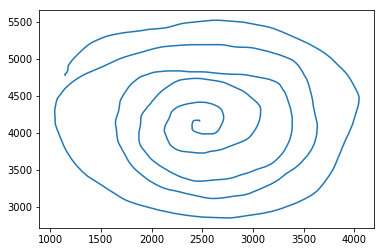

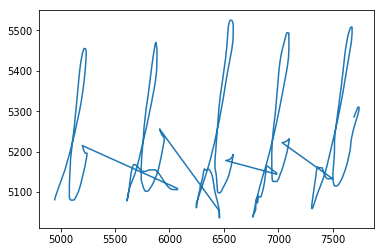

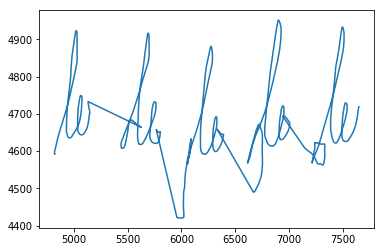

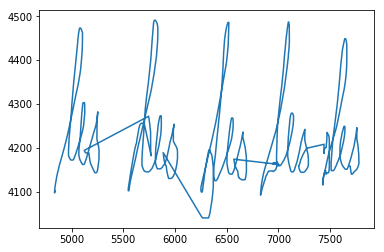

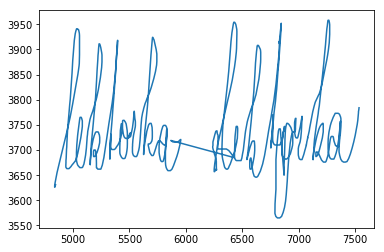

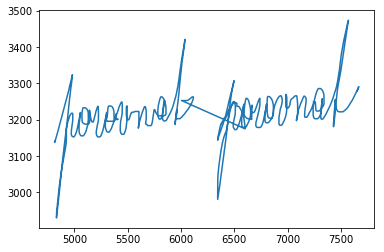

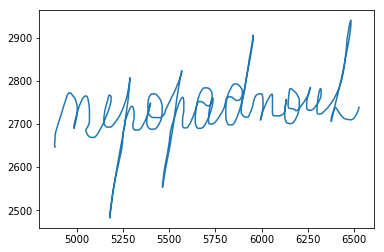

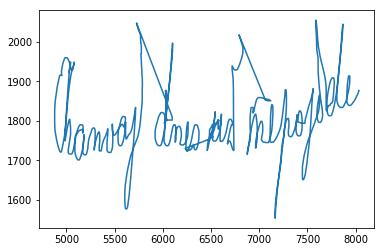

In [13]:
%matplotlib inline
subject_index=0#np.random.randint(0,len(labels))
print(subject_index)
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[subject_index][j],dtype=int)
    if task.size!=0:
        plt.figure()
        plt.plot(task[:,1],task[:,0])
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))

## Preprocessing
### Normalization
Normalize along axis 0 in order to normalize all the measures (and not all tasks independently)

0
spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


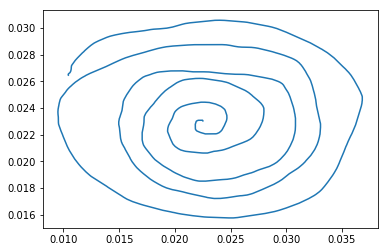

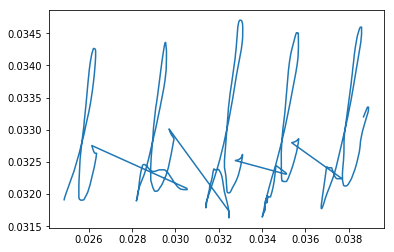

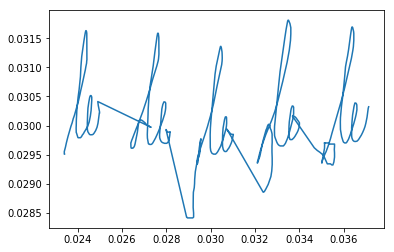

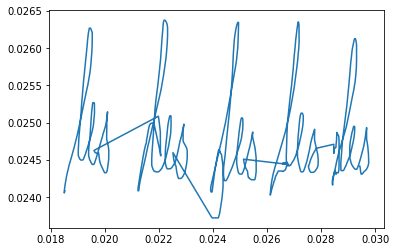

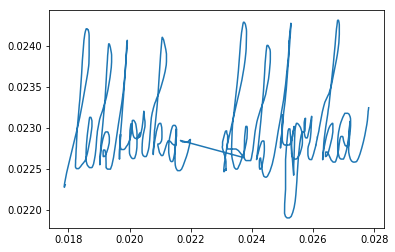

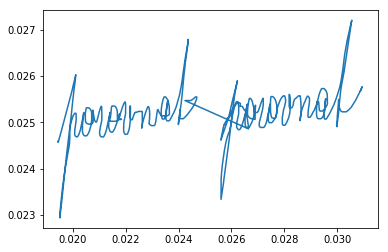

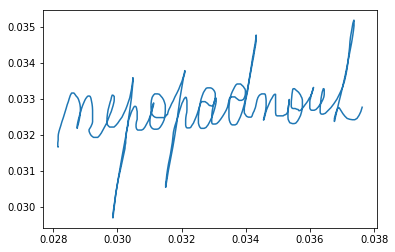

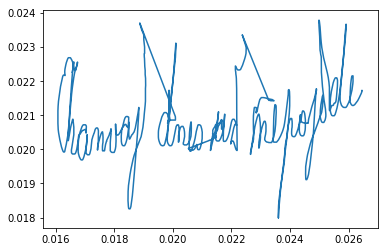

In [23]:
%matplotlib inline
subject_index=0#np.random.randint(0,len(labels))
print(subject_index)
for j in range(8):
    print(index2task[j])
    task=normalize(np.asarray(raw[subject_index][j],dtype=int),axis=0)
    if task.size!=0:
        plt.figure()
        plt.plot(task[:,1],task[:,0])
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))

## Spirals

In [67]:
spirals=[raw[i][0]  for i,subject in enumerate(raw) if len(raw[i][0])!=0]#discard the subjects that didn't perform spiral

In [73]:
spiral_targets= [target[i]  for i,subject in enumerate(raw) if len(raw[i][0])!=0]
#discard the subjects that didn't perform spiral

In [74]:
len(spirals),len(spiral_targets)

(72, 72)

/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

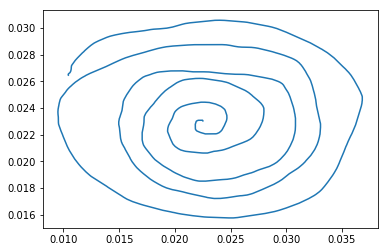

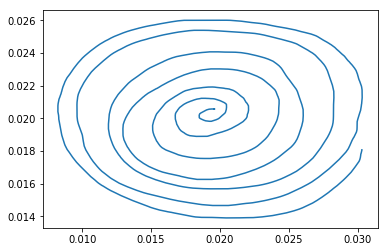

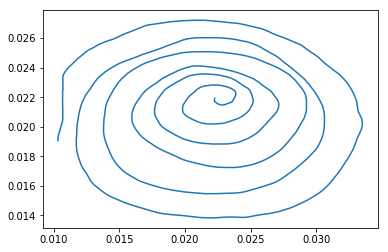

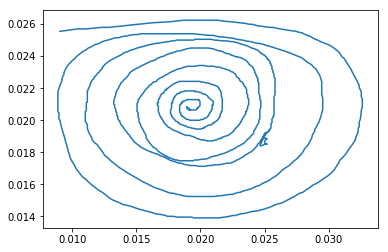

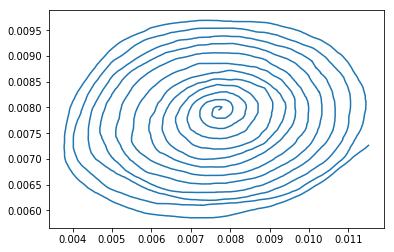

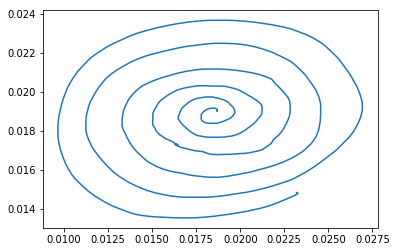

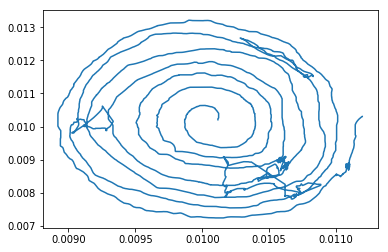

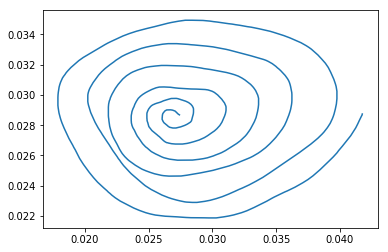

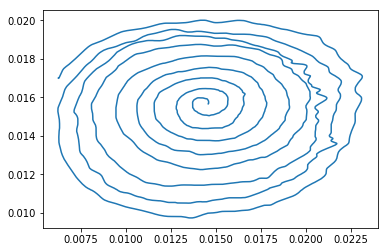

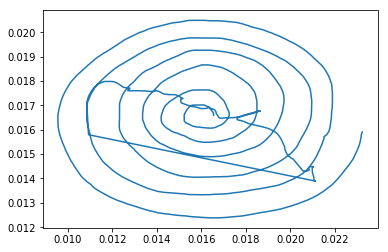

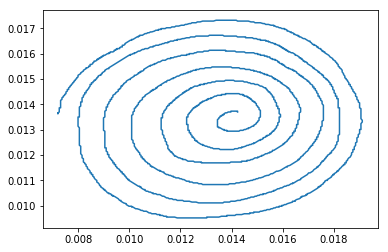

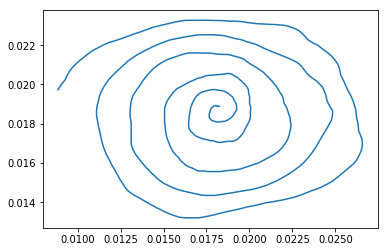

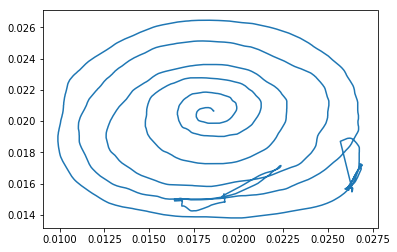

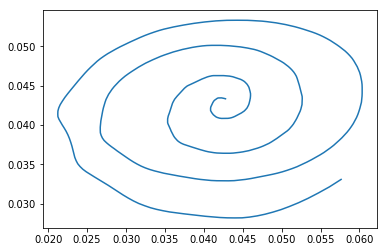

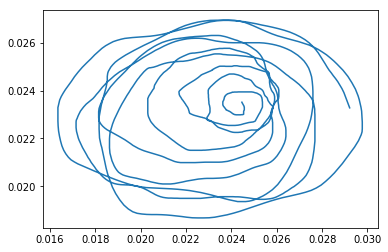

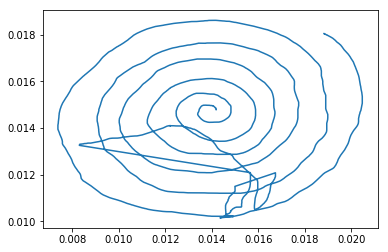

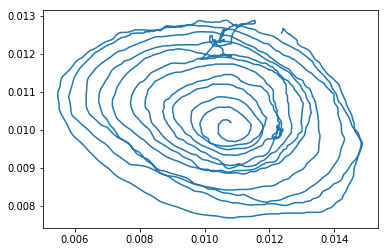

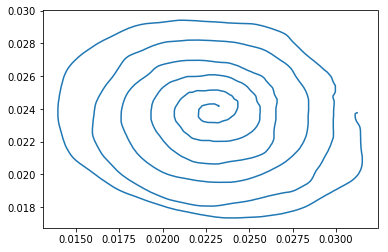

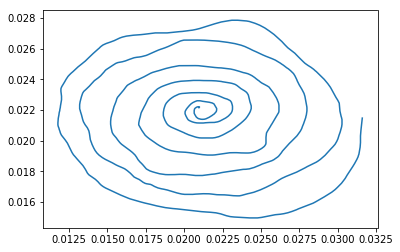

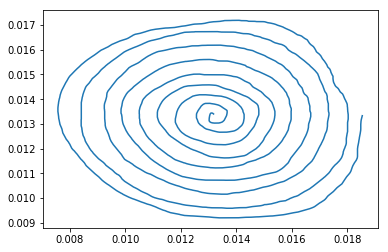

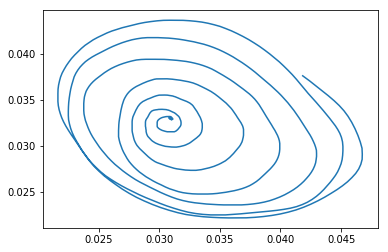

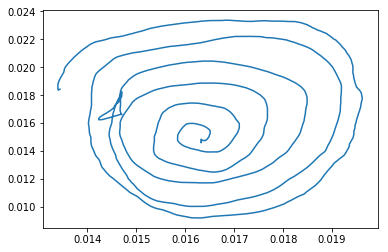

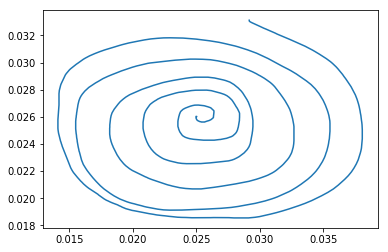

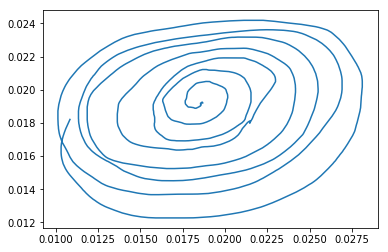

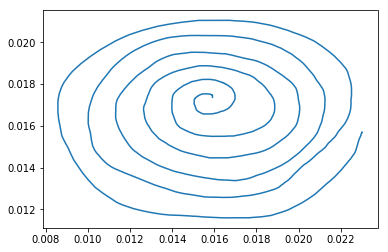

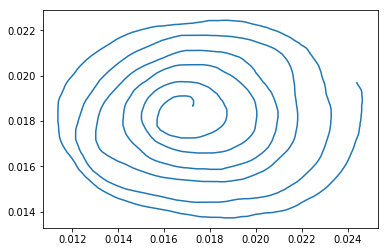

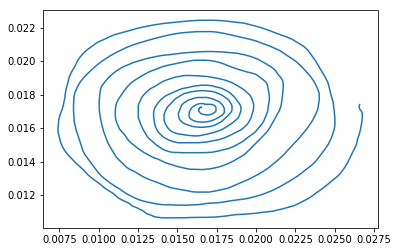

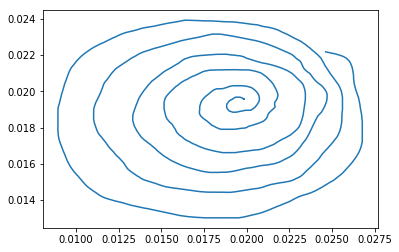

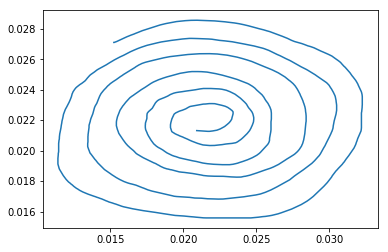

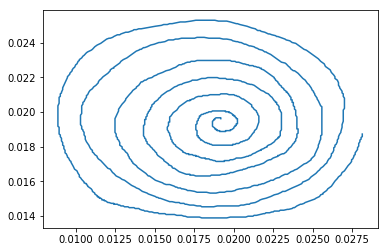

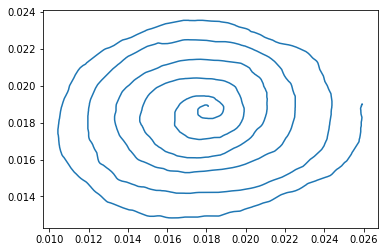

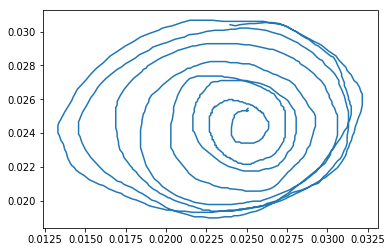

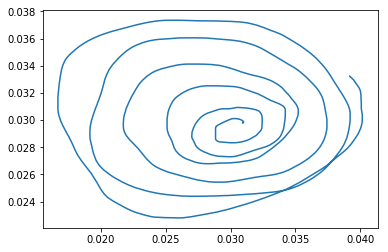

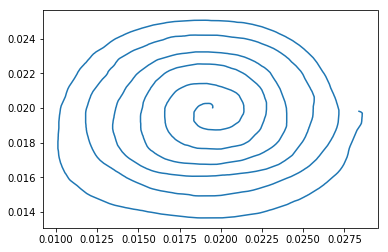

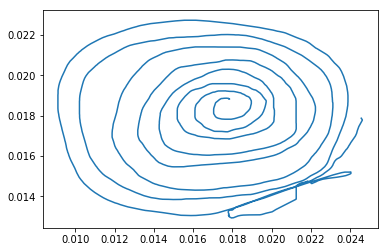

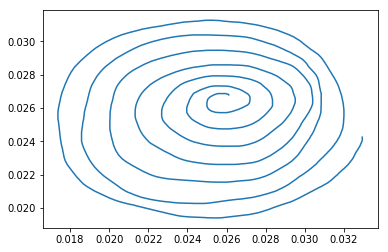

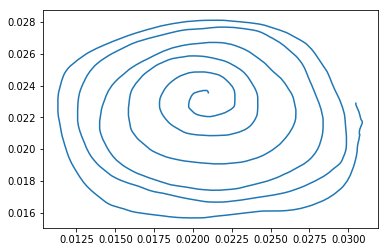

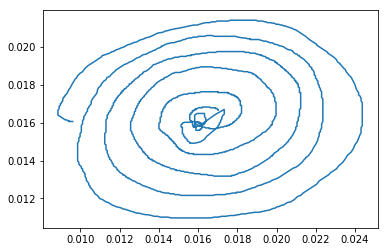

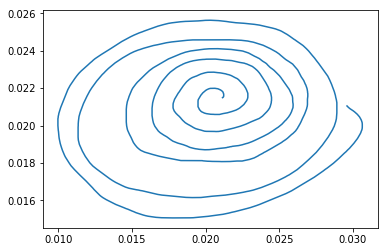

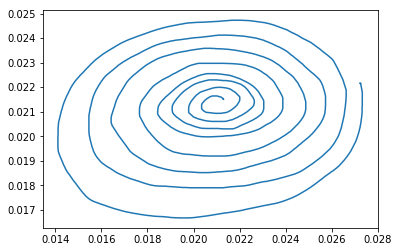

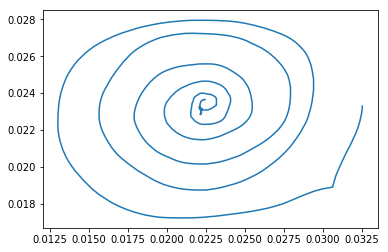

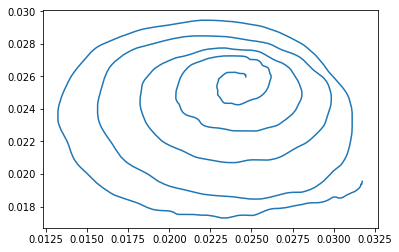

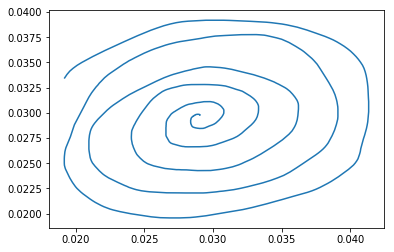

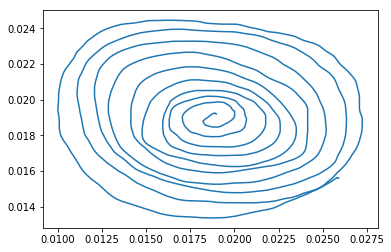

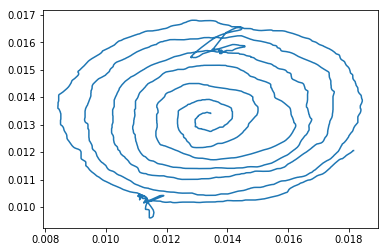

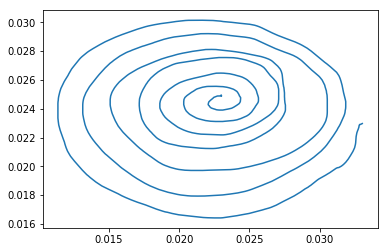

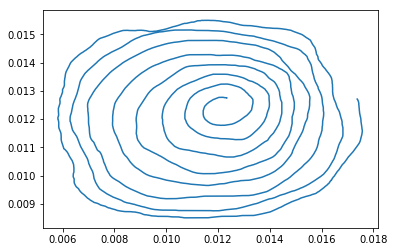

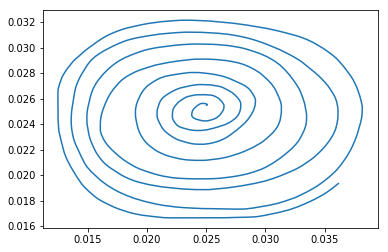

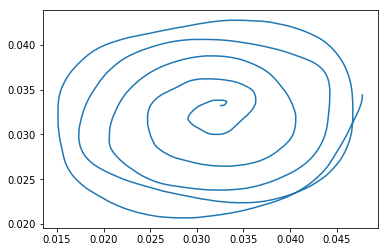

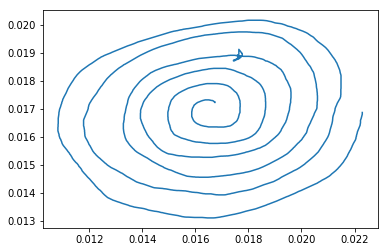

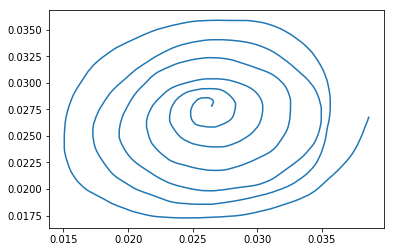

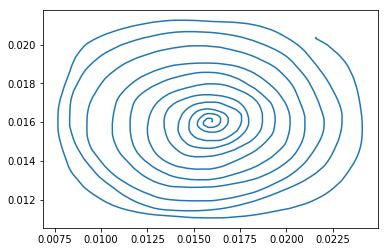

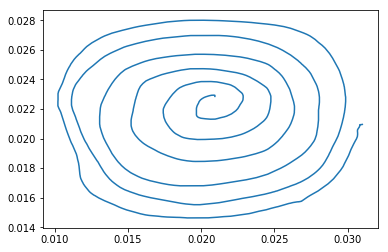

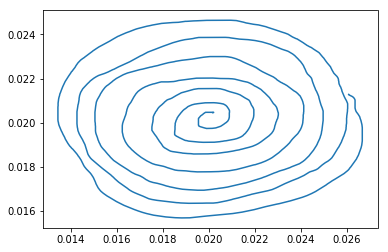

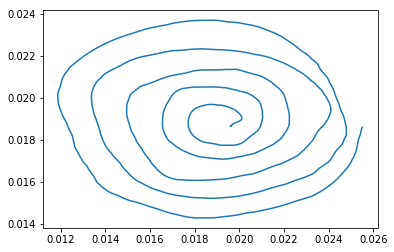

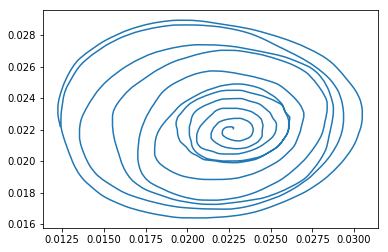

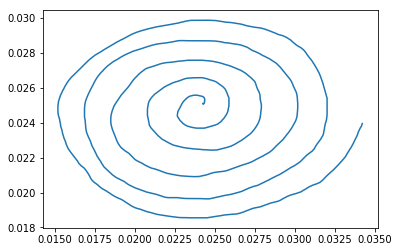

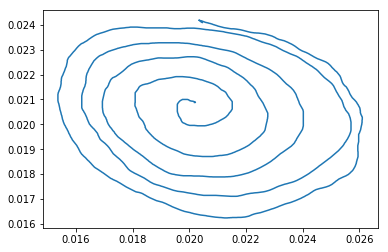

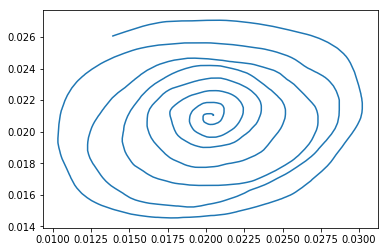

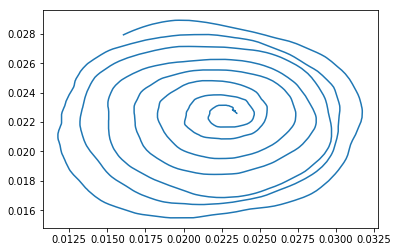

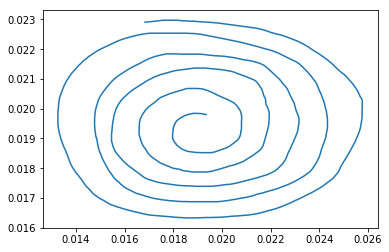

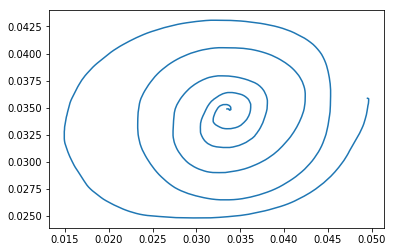

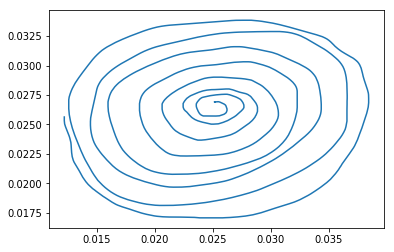

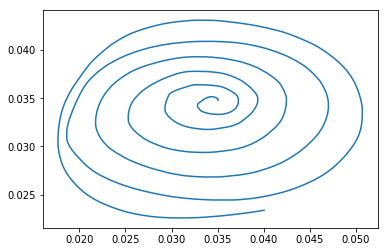

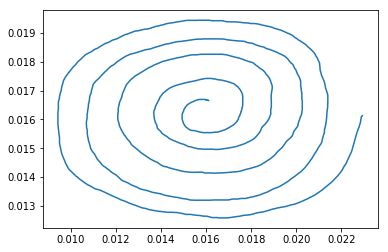

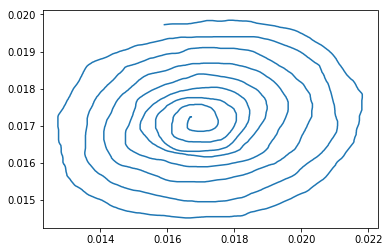

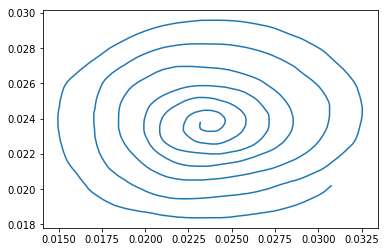

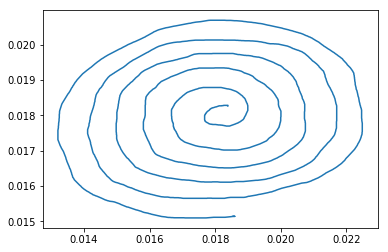

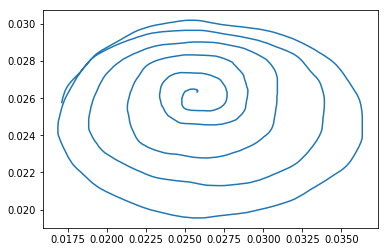

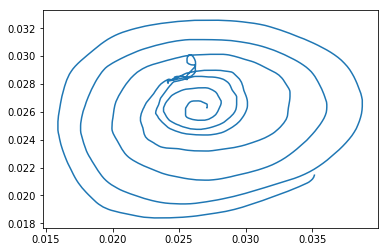

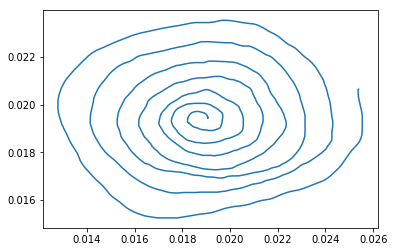

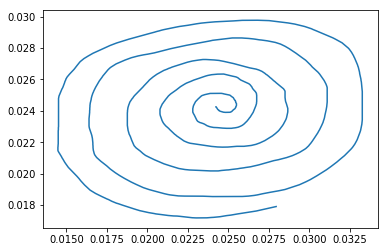

In [98]:
for i,spiral in enumerate(spirals):
    plt.figure()
    spirals[i]=normalize(np.asarray(spiral,dtype=int),axis=0)
    plt.plot(spirals[i][:,1],spirals[i][:,0])

### Data split
In order to provide for a meaningful comparison with works from Drotar et al. and Moetesum et al. we will evaluate our results using a 10-fold cross validation

In [94]:
split_ratio=len(spiral_targets)-len(spiral_targets)//10,len(spiral_targets)//10

In [95]:
split_ratio

(65, 7)

In [96]:
split_ratio[0]+split_ratio[1]==len(spiral_targets)

True

In [97]:
random_index=np.random.randint(0,high=len(spiral_targets),size=(len(spiral_targets)))

# Model
## Hyperparameters

In [157]:
input_size=7#==len(index2measure)
hidden_size=100
num_layers=2
bias=True
batch_first=False#we should unsqueeze(1) to add a batch dimension
dropout=0.2
bidirectional=True
batch_size=1

In [158]:
"""
Args:
    input_size: The number of expected features in the input `x`
    hidden_size: The number of features in the hidden state `h`
    num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
        would mean stacking two LSTMs together to form a `stacked LSTM`,
        with the second LSTM taking in outputs of the first LSTM and
        computing the final results. Default: 1
    bias: If ``False``, then the layer does not use bias weights `b_ih` and `b_hh`.
        Default: ``True``
    batch_first: If ``True``, then the input and output tensors are provided
        as (batch, seq, feature). Default: ``False``
    dropout: If non-zero, introduces a `Dropout` layer on the outputs of each
        LSTM layer except the last layer, with dropout probability equal to
        :attr:`dropout`. Default: 0
    bidirectional: If ``True``, becomes a bidirectional LSTM. Default: ``False``
"""
model=torch.nn.LSTM(input_size,hidden_size,num_layers,bias,batch_first,dropout,bidirectional)

In [172]:
subject.shape

torch.Size([1772, 1, 7])

In [184]:
#numpy to tensor
subject=torch.Tensor(spirals[0]).unsqueeze(1)#add batch dimension
target=torch.LongTensor(spiral_targets[0])

In [186]:
"""h_0 of shape (num_layers * num_directions, batch, hidden_size): 
tensor containing the initial hidden state for each element in the batch. 
If the RNN is bidirectional, num_directions should be 2, else it should be 1.

c_0 of shape (num_layers * num_directions, batch, hidden_size): 
tensor containing the initial cell state for each element in the batch.
"""
num_directions=1
if bidirectional:
    num_directions=2
h0 = torch.randn(num_layers * num_directions, batch_size, hidden_size)
c0 = torch.randn(num_layers * num_directions, batch_size, hidden_size)

In [188]:
model=model.to(device)
subject=subject.to(device)
h0 =h0.to(device)
c0=c0.to(device)

In [189]:
output, (h_n, c_n)=model(subject, (h0, c0))